# Hospital Readmission Analysis

## Libraries

In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print('successfully loaded')

successfully loaded


## Dataset info

In [107]:
df = pd.read_csv('diabetic_data.csv')
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [108]:
print('Shape : ',df.shape,'\n')
print(df.info())
df.describe()

Shape :  (101766, 50) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 no

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


## Data cleaning 

In [109]:
def check_null(df):
    df_null = df.isnull().mean()
    missing = []
    for i in range(len(df_null)):
        if(df_null[i]!=0.0):
            missing.append(df.columns[i])
            print(df_null[i]*100,'% of col ',df.columns[i]," is null." )
    if(missing== []):
        print('There is no Null value')
    else :
        print(missing)

In [110]:
check_null(df)

There is no Null value


In [111]:
for col in df.columns:
    print(col, ' : ')
    print(df[col].unique(),'\n')

encounter_id  : 
[  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr  : 
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race  : 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender  : 
['Female' 'Male' 'Unknown/Invalid'] 

age  : 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight  : 
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id  : 
[6 1 2 3 4 5 8 7] 

discharge_disposition_id  : 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id  : 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital  : 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code  : 
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty  : 
['Pediatrics-Endocrinology' '?' 'InternalMedicine

In [112]:
List_NA = ['?','Unknown/Invalid','Not Mapped','NULL']

for col in df.columns:
    df[col] = df[col].apply(lambda x : np.NaN if(x in List_NA) else x)

In [113]:
check_null(df)

2.2335554114340743 % of col  race  is null.
0.002947939390366134 % of col  gender  is null.
96.85847925633315 % of col  weight  is null.
39.5574160328597 % of col  payer_code  is null.
49.08220820313268 % of col  medical_specialty  is null.
0.02063557573256294 % of col  diag_1  is null.
0.3517874339170253 % of col  diag_2  is null.
1.398305917497003 % of col  diag_3  is null.
['race', 'gender', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']


In [114]:
df.drop(['weight','payer_code','encounter_id','examide','citoglipton','medical_specialty','diag_2','diag_3'],axis=1,inplace=True)
check_null(df)

2.2335554114340743 % of col  race  is null.
0.002947939390366134 % of col  gender  is null.
0.02063557573256294 % of col  diag_1  is null.
['race', 'gender', 'diag_1']


In [115]:
df.dropna(inplace=True)
check_null(df)

There is no Null value


In [116]:
df['readmitted'].value_counts()

NO     53305
>30    35004
<30    11164
Name: readmitted, dtype: int64

In [117]:
df['readmitted'] = df['readmitted'].apply(lambda x : 'YES' if(x == '<30') else 'NO')
df['readmitted'].value_counts()

NO     88309
YES    11164
Name: readmitted, dtype: int64

In [15]:
print(df.shape)
df = df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
print(df.shape)

(99473, 42)
(69658, 42)


# Visualizations

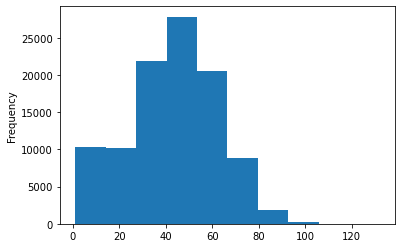

In [50]:
df.num_lab_procedures.plot(kind = 'hist');

C:\Users\minji\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='time_in_hospital', ylabel='Density'>

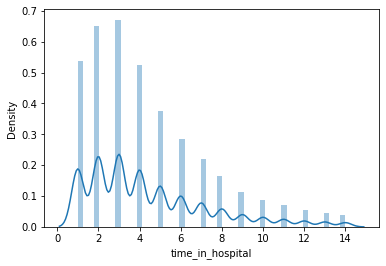

In [59]:
sns.distplot(df.time_in_hospital)

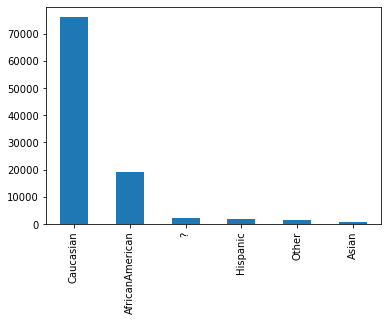

In [104]:
df.race.value_counts().plot(kind = 'bar');

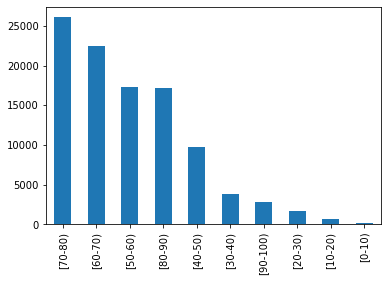

In [62]:
df.age.value_counts().plot(kind = 'bar');

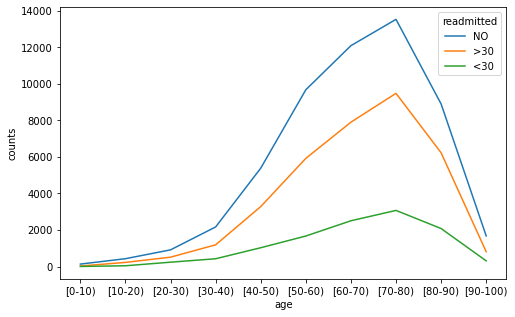

In [102]:
plt.figure(figsize=(8, 5))
sns.lineplot(x = "age", y = "counts", hue = "readmitted", 
             data = df["age"].groupby(df["readmitted"]).value_counts().rename("counts").reset_index().sort_values("age"));

<AxesSubplot:>

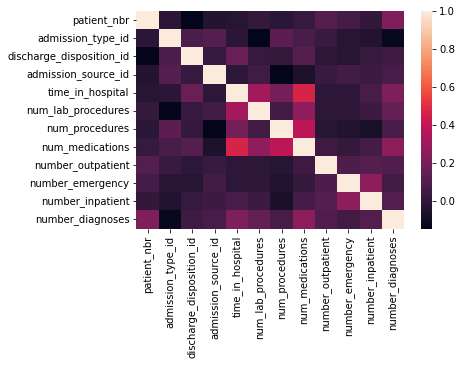

In [92]:
sns.heatmap(df.corr())

## Feature engineering :

We have too many features, we will ave either too choose or create new features combining the given ones

In [16]:
def readmitted_vs(col):
    df1 = pd.DataFrame()
    df1['readmitted'] = df[df['readmitted']=='YES'].groupby([col])['readmitted'].count()
    df1['not-readmitted'] = df[df['readmitted']=='NO'].groupby([col])['readmitted'].count()
    title = 'Number of readmitted patient vs '+ col
    df1.plot(kind='bar',y=['readmitted','not-readmitted'], title=title)


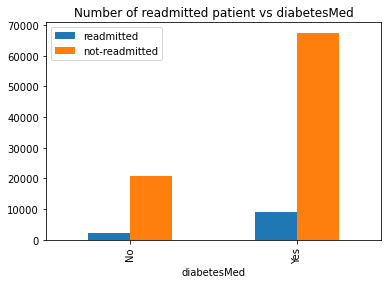

In [118]:
readmitted_vs('diabetesMed')

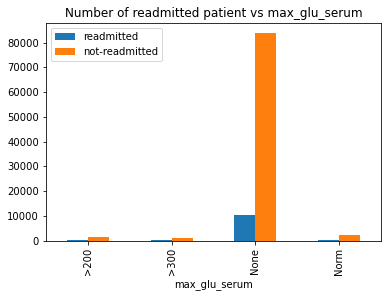

In [119]:
readmitted_vs('max_glu_serum')

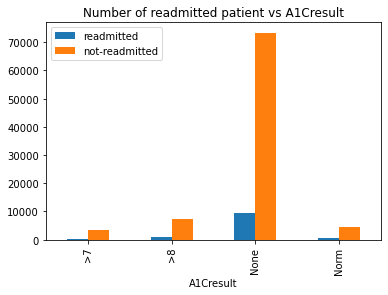

In [120]:
readmitted_vs('A1Cresult')

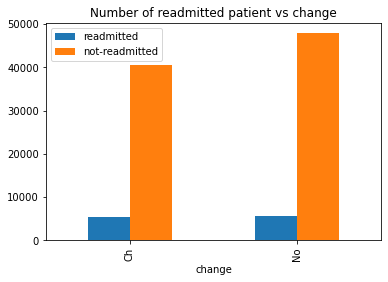

In [122]:
readmitted_vs('change')

In [20]:
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,183087545,Caucasian,Female,[70-80),1,1,7,9,50,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
101755,188574944,Other,Female,[40-50),1,1,7,14,73,6,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101756,140199494,Other,Female,[60-70),1,1,7,2,46,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,120975314,Caucasian,Female,[80-90),1,1,7,5,76,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO


C:\Users\minji\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


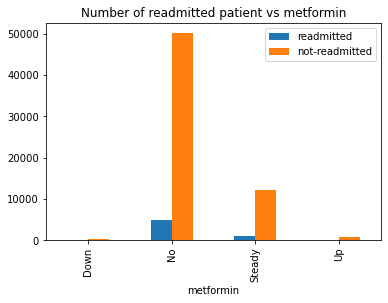

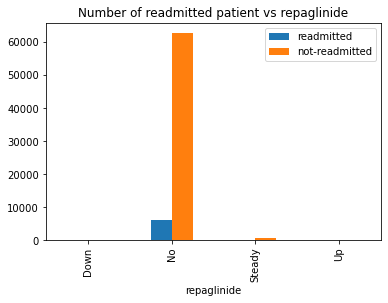

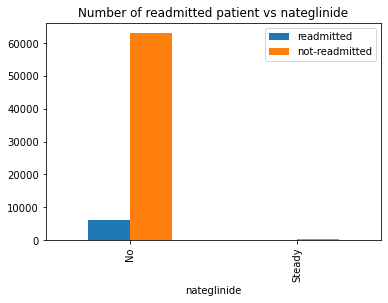

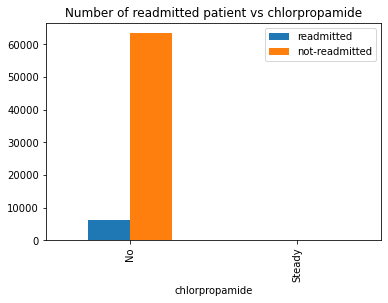

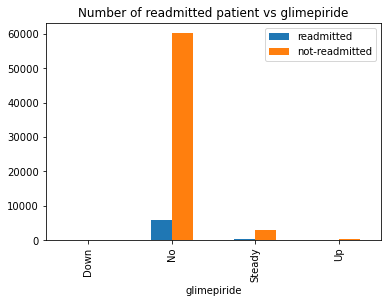

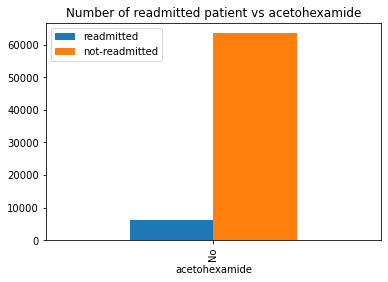

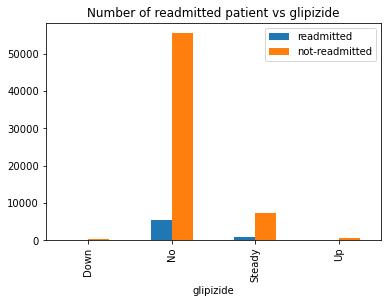

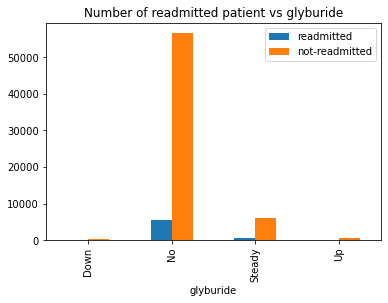

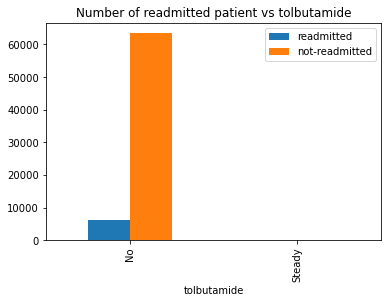

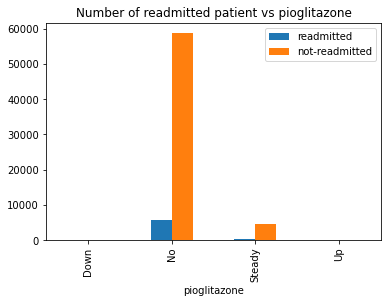

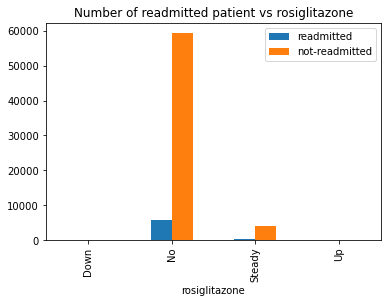

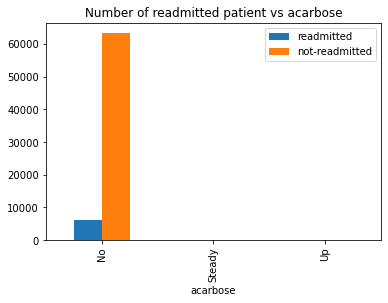

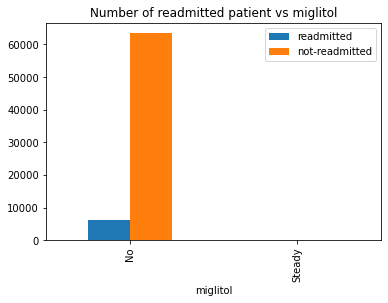

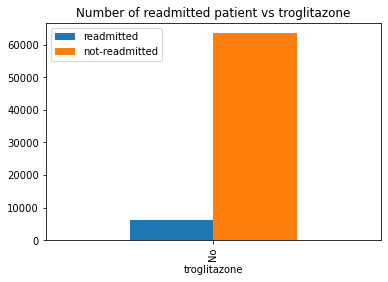

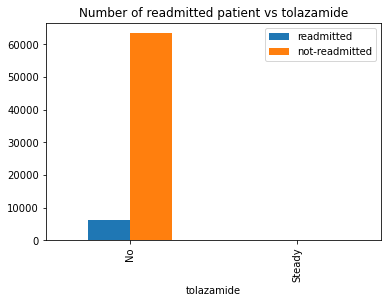

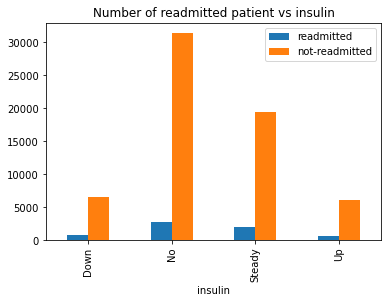

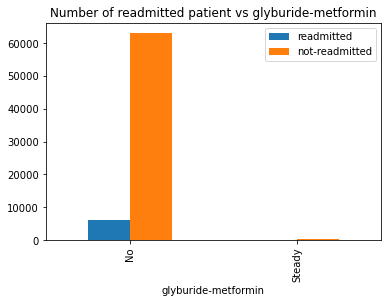

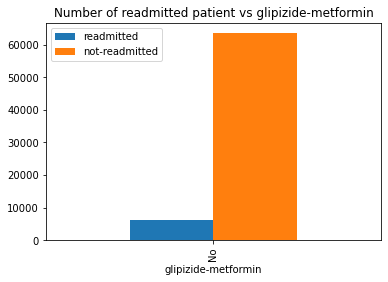

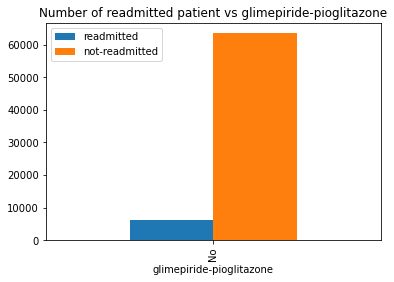

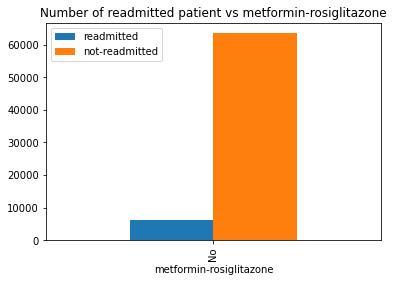

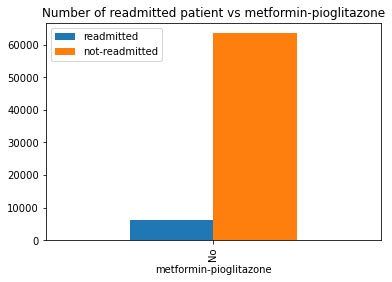

In [21]:
drugs = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']
for d in drugs:
    readmitted_vs(d)

We can see that some drugs are useless so we will drop the columns corresponding to them.

In [22]:
useless_drugs = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'glipizide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

df.drop(useless_drugs,inplace=True,axis=1)
df.shape

(69658, 27)

# Data pre-processing

In [23]:
numerics  = []
labels = []

for col in df.columns:
    if(df[col].dtype in ['int64','float64']):
        numerics.append(col)
    else :
        labels.append(col)
print('encoded/numbers : ', numerics)
print('to encode : ',labels)

encoded/numbers :  ['patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
to encode :  ['race', 'gender', 'age', 'diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [25]:
for col in labels :
    ordinal_enc = OrdinalEncoder()
    df.loc[:,col] = ordinal_enc.fit_transform(df.loc[:,col].values.reshape(-1,1))

In [26]:
df.head().T

,0,1,2,3,4
patient_nbr,8222157.0,55629189.0,86047875.0,82442376.0,42519267.0
race,2.0,2.0,0.0,2.0,2.0
gender,0.0,0.0,0.0,1.0,1.0
age,0.0,1.0,2.0,3.0,4.0
admission_type_id,6.0,1.0,1.0,1.0,1.0
discharge_disposition_id,25.0,1.0,1.0,1.0,1.0
admission_source_id,1.0,7.0,7.0,7.0,7.0
time_in_hospital,1.0,3.0,2.0,2.0,1.0
num_lab_procedures,41.0,59.0,11.0,44.0,51.0
num_procedures,0.0,0.0,5.0,1.0,0.0


In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["readmitted",'patient_nbr'], axis=1)
y = df.readmitted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 37)

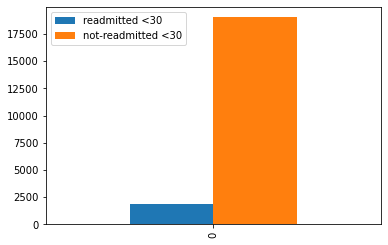

In [41]:
train_repartition = pd.DataFrame(data = [[int(y_train.sum()),int(y_train.shape[0] - y_train.sum())]] ,columns = ['readmitted <30','not-readmitted <30'])
train_repartition.plot(kind='bar');

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [30]:

def test_tree_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    m_tree = DecisionTreeClassifier()
    
    grid = GridSearchCV(m_tree,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Random Forest :')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    tree_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,tree_res

def test_rf_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier()
    
    grid = GridSearchCV(rf,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Random Forest :')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    rf_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,rf_res
    
    

def test_gb_c(parameters, scoring_type,X_train, X_test, y_train, y_test):
    gb = GradientBoostingClassifier()
    
    grid = GridSearchCV(gb,parameters,scoring=scoring_type)

    grid.fit(X_train,y_train)
    
    print('Gradiant boosting : ')
    print('Best training accuracy = ',grid.best_score_)
    print('Best parameters : ',grid.best_params_)
    pred = grid.best_estimator_.predict(X_test)
    matrix = confusion_matrix( pred , y_test)
    print('Validation accuracy = ',metrics.accuracy_score(pred , y_test))
    print('test repartition : \n',y_test.value_counts())
    print('Confusion matrix : \n',matrix)
    gb_res = pd.DataFrame(grid.cv_results_)
    
    return grid.best_estimator_,gb_res
    


In [31]:
def validation_curve(res):
    plt.plot(res['param_n_estimators'],res['mean_test_score'])
    plt.show()


In [37]:

scoring_type='accuracy'

##------------------------------------------Decision tree------------------------------------------##


param_tree = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], criterion=["entropy"]}

model_tree,tree_res = test_tree_c(param_tree, scoring_type,X_train, X_test, y_train, y_test)

SyntaxError: invalid syntax (Temp/ipykernel_22068/2391573704.py, line 6)

Random Forest :
Best training accuracy =  0.9097956517607404
Best parameters :  {'max_features': 25, 'n_estimators': 150}
Validation accuracy =  0.9103586882959742
test repartition : 
 0.0    44455
1.0     4306
Name: readmitted, dtype: int64
Confusion matrix : 
 [[44303  4219]
 [  152    87]]


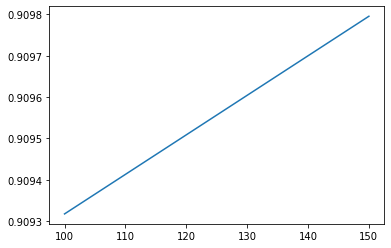

In [38]:
scoring_type='accuracy'

##------------------------------------------Bagging------------------------------------------##

# Number of trees in random forest
n_estimators = [100,150]
# Max features
max_features = [X_train.shape[1]]

param_rf = {'n_estimators': n_estimators,
            'max_features' : max_features
               }
bag,bag_res = test_rf_c(param_rf, scoring_type,X_train, X_test, y_train, y_test)
validation_curve(bag_res)

Random Forest :
Best training accuracy =  0.9110398655386754
Best parameters :  {'max_features': 'sqrt', 'n_estimators': 111}
Validation accuracy =  0.9116507044564304
test repartition : 
 0.0    44455
1.0     4306
Name: readmitted, dtype: int64
Confusion matrix : 
 [[44444  4297]
 [   11     9]]


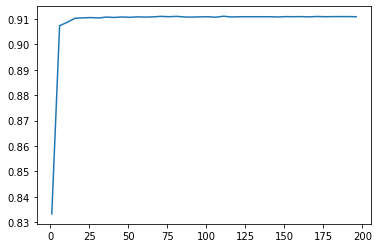

In [39]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

# Number of trees in random forest
n_estimators = [1+5*i for i in range(0,40)]
# Max features
max_features = ['sqrt'] #  = sqrt(n_features)

param_rf = {'n_estimators': n_estimators,
            'max_features' : max_features
               }
rf,rf_res = test_rf_c(param_rf, scoring_type,X_train, X_test, y_train, y_test)
validation_curve(rf_res)


Gradiant boosting : 
Best training accuracy =  0.9111834176578952
Best parameters :  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 20, 'random_state': 1, 'subsample': 1}
Validation accuracy =  0.911773753614569
test repartition : 
 0.0    44455
1.0     4306
Name: readmitted, dtype: int64
Confusion matrix : 
 [[44454  4301]
 [    1     5]]


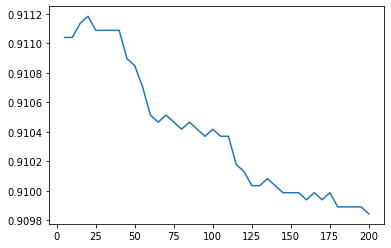

In [40]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [5*i for i in range(1,41)], 'learning_rate' : [.1], 'max_depth' : [3], 'subsample' : [1], 'random_state': [1]}
gb,gb_res = test_gb_c(param_gb, scoring_type,X_train, X_test, y_train, y_test)
validation_curve(gb_res)

## Using smote to oversample

In [123]:
y.value_counts()

0.0    63493
1.0     6165
Name: readmitted, dtype: int64

In [124]:
X.dtypes

race                        float64
gender                      float64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
number_diagnoses              int64
max_glu_serum               float64
A1Cresult                   float64
metformin                   float64
glimepiride                 float64
glyburide                   float64
pioglitazone                float64
rosiglitazone               float64
insulin                     float64
change                      float64
diabetesMed                 float64
dtype: object

In [127]:
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\minji\anaconda3\lib\site-packages\sklearn\base.py)

In [ ]:
sm = SMOTE()
X_new, y_new = sm.fit_resample(X,y)

In [ ]:
#if you have the error :  AttributeError: 'NoneType' object has no attribute 'split'  ,please do: pip install threadpoolctl==3.1.0

In [ ]:
X_new.shape

In [ ]:
y_new.value_counts()

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 37)

train_repartition2 = pd.DataFrame(data = [[int(y_train_new.sum()),int(y_train_new.shape[0] - y_train_new.sum())]] ,columns = ['readmitted <30','not-readmitted <30'])
train_repartition2.plot(kind='bar')

In [128]:
scoring_type='accuracy'

##------------------------------------------GB------------------------------------------##

param_gb = {'n_estimators': [50*i for i in range(4,7)], 'loss' : ['deviance'],'learning_rate' : [1], 'max_depth' : [3], 'subsample' : [1], 'random_state': [1]}
gb,gb_res = test_gb_c(param_gb, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)
validation_curve(gb_res)

NameError: name 'X_train_new' is not defined

In [ ]:
pred = gb.predict(X)
confusion_matrix( pred , y)

In [ ]:
scoring_type='accuracy'

##------------------------------------------RF------------------------------------------##

# Number of trees in random forest
n_estimators = [50*i for i in range(5,7)]
# Max features
max_features = ['sqrt']

param_rf = {'n_estimators': n_estimators,
            'max_features' : max_features,
            'criterion' : ['entropy']
               }
rf,rf_res = test_rf_c(param_rf, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)
validation_curve(rf_res)

In [ ]:
pred = rf.predict(X)
confusion_matrix( pred , y)

In [ ]:

scoring_type='accuracy'

##------------------------------------------Decision tree------------------------------------------##

#4,5,6,7,8,9,10,11,12,15,20
param_tree = {'max_depth':[4*i for i in range(1,9)],'criterion' : ["entropy"]}

model_tree,tree_res = test_tree_c(param_tree, scoring_type,X_train_new, X_test_new, y_train_new, y_test_new)

In [ ]:
pred = model_tree.predict(X)
confusion_matrix( pred , y)

## What we tried without any success, sadly ...

feature selection before creating the model using Lasso: only one feature was relevent according to Lasso's model

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
print(importance)